# Credit Card Fraud Detection - Exploratory Data Analysis

This notebook explores the `creditcard.csv` dataset containing anonymized credit card transactions and a binary fraud label (`Class`).

We will:
- Load and quickly inspect the data
- Analyze the class (fraud vs. non-fraud) distribution and imbalance
- Explore feature correlations with the fraud label
- Examine the distribution and outliers of the `Amount` feature
- Train a quick baseline Random Forest model to inspect feature importances

## 1. Load libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent plotting style
sns.set(style="whitegrid")

# Load the credit card transactions dataset
df = pd.read_csv("../data/creditcard.csv")

## 2. Basic dataset inspection

In this section we:
- Preview a few rows to understand the columns and value ranges
- Inspect the schema, data types, and memory usage
- Look at summary statistics for numerical features
- Check the distribution of the target label `Class`

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Class distribution and imbalance

We inspect how many transactions are fraudulent vs. non-fraudulent and visualize the strong class imbalance, which is important for choosing metrics and handling sampling later.

In [5]:
class_counts = df["Class"].value_counts()
class_ratio = df["Class"].value_counts(normalize=True) * 100

print("Class counts:")
print(class_counts)

print("\nClass ratio (%):")
print(class_ratio.round(4))


Class counts:
Class
0    284315
1       492
Name: count, dtype: int64

Class ratio (%):
Class
0    99.8273
1     0.1727
Name: proportion, dtype: float64


In [6]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

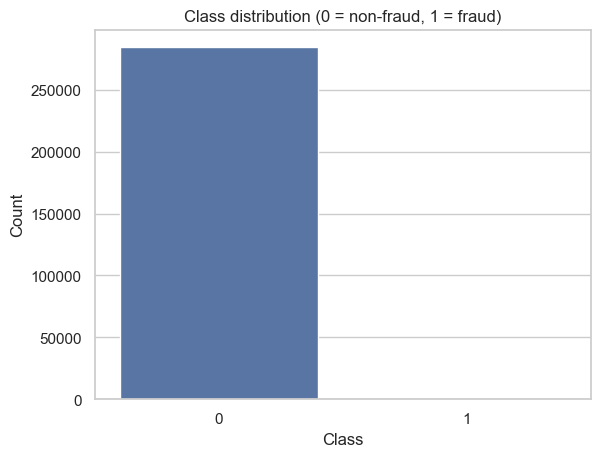

In [7]:
ax = sns.countplot(x='Class', data=df)
ax.set_title('Class distribution (0 = non-fraud, 1 = fraud)')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.show()


## 4. Feature correlations with the fraud label

We compute the full correlation matrix and then focus on how strongly each feature correlates with the target `Class`, highlighting the top correlated features.

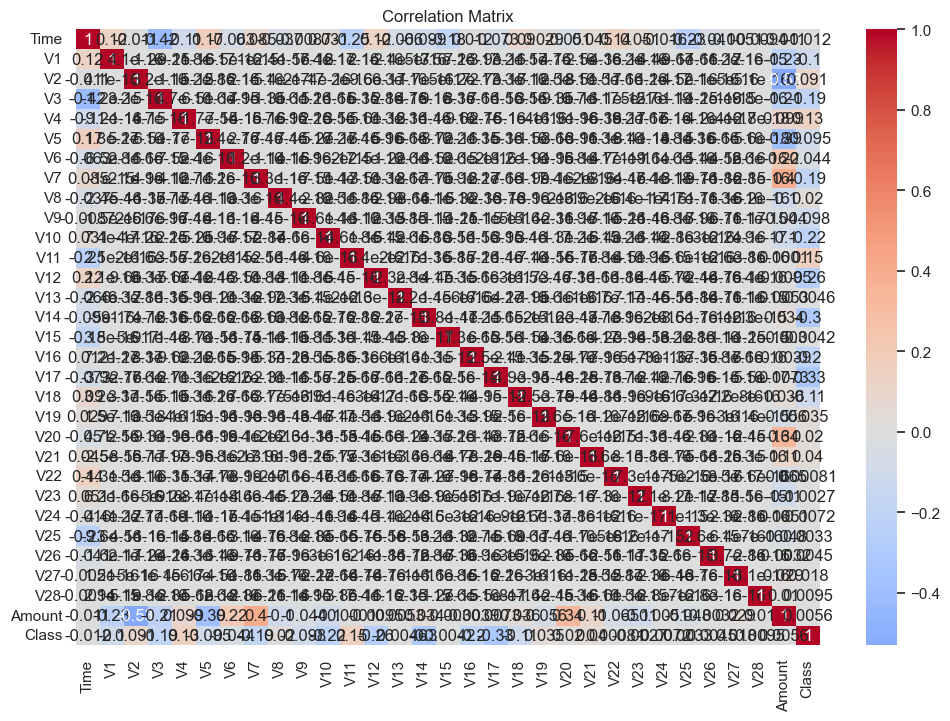

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [9]:
corr_with_target = corr_matrix['Class'].sort_values(ascending=False)
print(corr_with_target)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


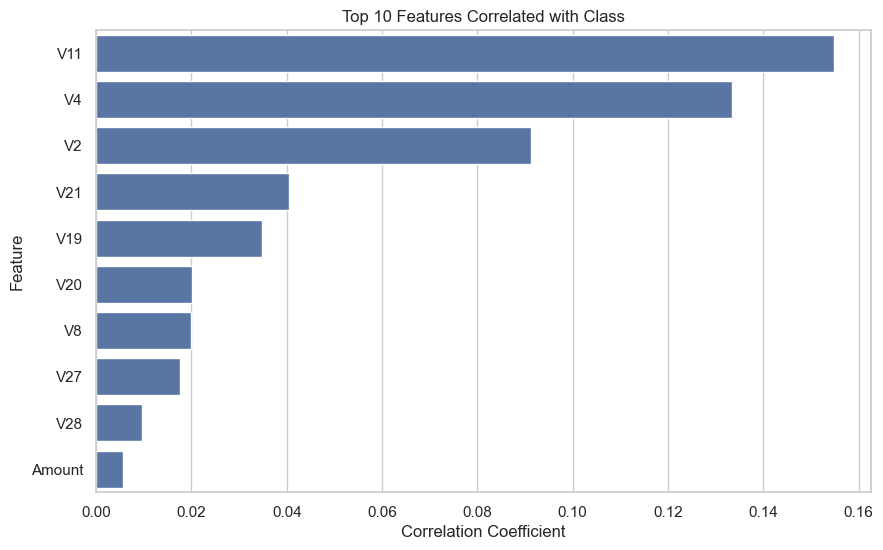

In [10]:
top_corr = corr_with_target[1:11] # Exclude the target variable itself
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 10 Features Correlated with Class')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

## 5. Transaction amount distribution and outliers

We examine the distribution of transaction amounts (especially for fraudulent transactions) and detect potential outliers in the `Amount` feature using the IQR rule.

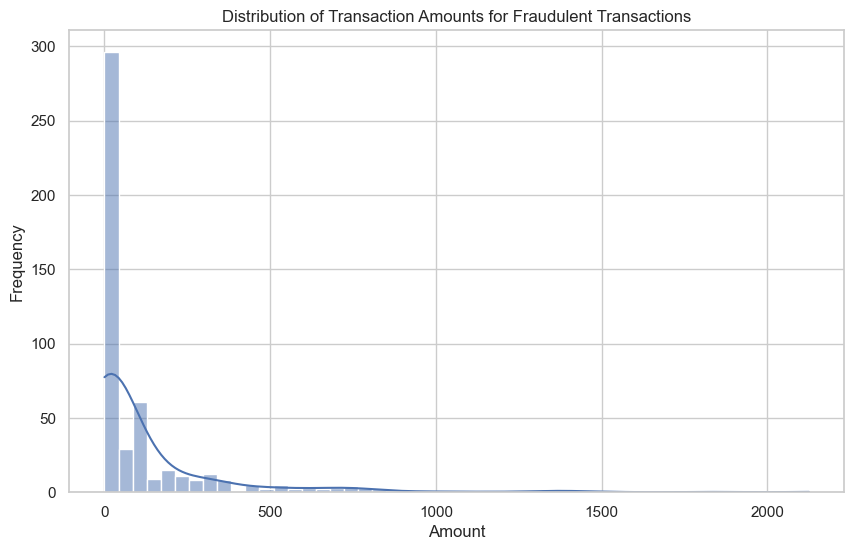

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(fraud['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

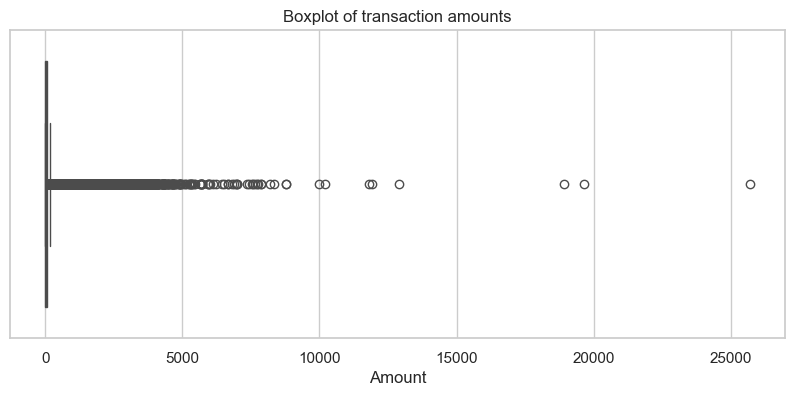

In [12]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of transaction amounts')
plt.xlabel('Amount')
plt.show()


In [13]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

print(f"Number of outliers in 'Amount': {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.4f}%")

Number of outliers in 'Amount': 31904
Percentage of outliers: 11.2020%


## 6. Baseline Random Forest feature importance

We fit a simple Random Forest classifier to get a first look at which features are most important for distinguishing fraudulent from non-fraudulent transactions. This is not a final model, just an exploratory baseline.

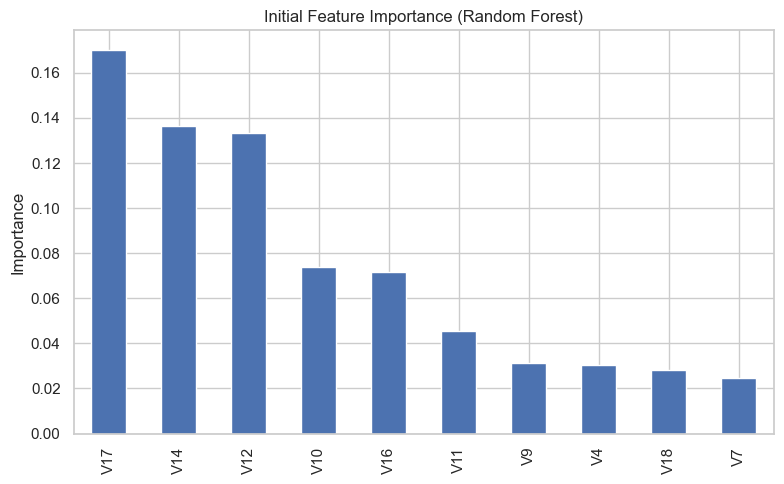

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train/test split with stratification to preserve class imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Baseline Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)

# Top 10 most important features
top_features = feature_importance.sort_values(ascending=False).head(10)

top_features.plot(kind='bar', figsize=(8, 5))
plt.title("Initial Feature Importance (Random Forest)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
